In [1]:
from dgfip.distance import mean_distances

In [3]:
f = mean_distances(categories=['C17_POP15P_CS2'], public='professionnels', filename='departement_distance_pro.geojson')

/home/titouan/projects/OptimisationFiscale/.venv/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

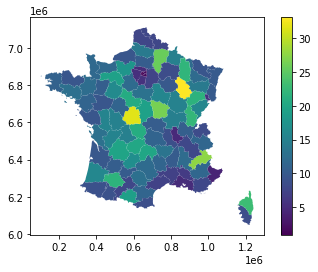

In [10]:
f[f.service=='Centre de Finances publiques'].plot('distance_avg', legend=True)

<AxesSubplot:>

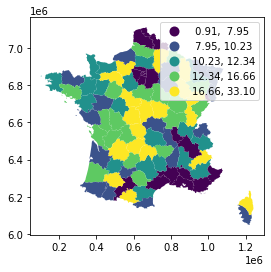

In [9]:
f[f.service=='Centre de Finances publiques'].plot('distance_avg', legend=True, scheme='Quantiles')